# ***Hand-Written-Digit-Recognition*** 

### Introduction
The MNIST (Modified National Institute of Standards and Technology) dataset is a benchmark dataset in the field of computer vision, specifically for handwritten digit recognition. It consists of 60,000 training images and 10,000 testing images, each a 28x28 grayscale image of a handwritten digit from 0 to 9. Due to its simplicity and well-defined nature, MNIST has been extensively used as a starting point for researchers and practitioners to test and compare various machine learning algorithms.

#### Project Objective
The primary goal of this project is to develop an accurate model capable of recognizing handwritten digits from the MNIST dataset. This involves:

* Loading and preprocessing the MNIST dataset
* Building and training a suitable machine learning model
* Evaluating the model's performance on the test dataset


#### Data Preprocessing

 ##### Import Libraries and Framework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the data

In [2]:
from tensorflow.keras.datasets import mnist # type: ignore
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
# Shape and count images in the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Total number of training images: {x_train.shape[0]}")
print(f"Total number of test images: {x_test.shape[0]}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Total number of training images: 60000
Total number of test images: 10000


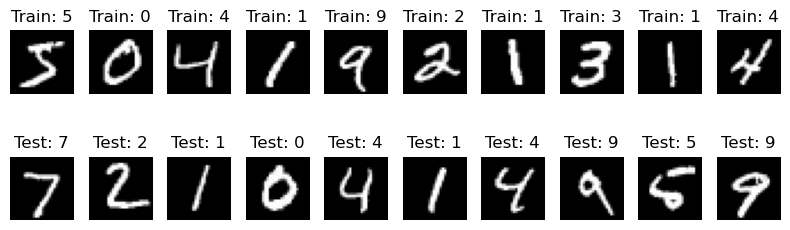

In [4]:
# Display some images from the training and testing data
num_samples = 10
plt.figure(figsize=(8,3))
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Train: {y_train[i]}")
    plt.axis('off')
for i in range(num_samples):
    plt.subplot(2, num_samples, num_samples + i + 1) 
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Test: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

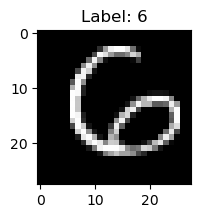

In [5]:
# Display a random sample image
sample_index = 2324
plt.figure(figsize=(2, 2))
plt.imshow(x_train[sample_index], cmap='gray')
plt.title(f"Label: {y_train[sample_index]}")
plt.show()

In [6]:
# Print unique labels and their counts
unique_labels, counts = np.unique(y_train, return_counts=True)
label_distribution = dict(zip(unique_labels, counts))
print("Label distribution in the training set:")
print(label_distribution)


Label distribution in the training set:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


##### Data normalization, Reshape and spliting the data

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)


In [9]:
# Compute basic statistics
mean_train = np.mean(x_train)
std_train = np.std(x_train)
print(f"Training data - Mean: {mean_train:.4f}, Standard Deviation: {std_train:.4f}")

mean_test = np.mean(x_test)
std_test = np.std(x_test)
print(f"Test data - Mean: {mean_test:.4f}, Standard Deviation: {std_test:.4f}")


Training data - Mean: 0.1307, Standard Deviation: 0.3081
Test data - Mean: 0.1325, Standard Deviation: 0.3105


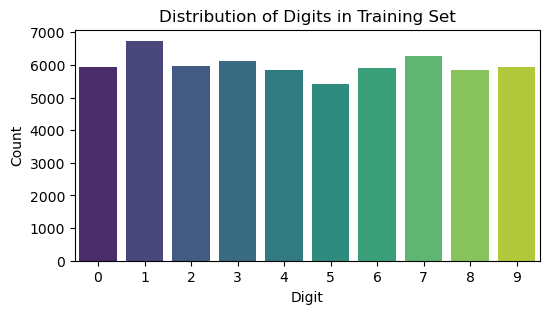

In [10]:
# Check class distribution
df_labels = pd.DataFrame(y_train, columns=['Label'])
plt.figure(figsize=(6, 3))
sns.countplot(data=df_labels, x='Label', palette='viridis')
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

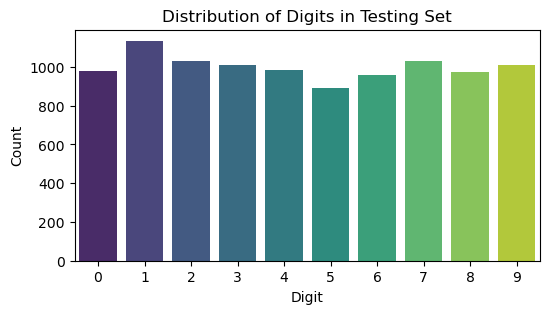

In [11]:
df_labels_test = pd.DataFrame(y_test, columns=['Label'])
plt.figure(figsize=(6, 3))
sns.countplot(data=df_labels_test, x='Label', palette='viridis')
plt.title('Distribution of Digits in Testing Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

In [12]:
# Split Data
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train_flattened, y_train, test_size=0.2, random_state=44)
x_train_split_cnn, x_val_cnn, y_train_split_cnn, y_val_cnn = train_test_split(x_train_cnn, y_train, test_size=0.2, random_state=44)
y_train_split_cnn = to_categorical(y_train_split_cnn, num_classes=10)
y_val_cnn = to_categorical(y_val_cnn, num_classes=10)


##### Import the framework for train the models

In [13]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import keras_tuner as kt
import joblib

##### Define and Train Base Models

In [14]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=300, solver='lbfgs', multi_class='multinomial')
logistic_model.fit(x_train_split, y_train_split)
y_test_pred_logistic = logistic_model.predict(x_test_flattened)
accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
print(f"Logistic Regression Test Accuracy (Base): {accuracy_logistic:.4f}")


Logistic Regression Test Accuracy (Base): 0.9241


In [15]:
# SVM
svm_model = SVC()
svm_model.fit(x_train_split, y_train_split)
y_test_pred_svm = svm_model.predict(x_test_flattened)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Test Accuracy (Base): {accuracy_svm:.4f}")


SVM Test Accuracy (Base): 0.9778


In [16]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_split, y_train_split)
y_test_pred_knn = knn_model.predict(x_test_flattened)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN Test Accuracy (Base): {accuracy_knn:.4f}")


KNN Test Accuracy (Base): 0.9678


In [17]:
# CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(x_train_split_cnn, y_train_split_cnn, epochs=5, validation_data=(x_val_cnn, y_val_cnn))
y_test_pred_cnn = cnn_model.predict(x_test_cnn)
y_test_pred_cnn_classes = np.argmax(y_test_pred_cnn, axis=1)
accuracy_cnn = accuracy_score(y_test, y_test_pred_cnn_classes)
print(f"CNN Test Accuracy (Base): {accuracy_cnn:.4f}")


e:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8895 - loss: 0.3646 - val_accuracy: 0.9745 - val_loss: 0.0790
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9847 - loss: 0.0537 - val_accuracy: 0.9822 - val_loss: 0.0572
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9871 - val_loss: 0.0399
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9930 - loss: 0.0242 - val_accuracy: 0.9881 - val_loss: 0.0361
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9946 - loss: 0.0179 - val_accuracy: 0.9891 - val_loss: 0.0368
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN Test Accuracy (Base): 0.9903


##### metrics and cross- validation scores

In [18]:
# Calculate performance metrics and cross-validation scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
def evaluate_model(model, x_val, y_val, model_name):
    y_val_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    recall = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    cv_scores = cross_val_score(model, x_train_split, y_train_split, cv=5)
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    return accuracy, precision, recall, f1


In [19]:
# Evaluate Logistic Regression
logistic_metrics = evaluate_model(logistic_model, x_val, y_val, "Logistic Regression")


Logistic Regression Evaluation:
Accuracy: 0.9149
Precision: 0.9149
Recall: 0.9149
F1 Score: 0.9148

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1154
           1       0.95      0.97      0.96      1285
           2       0.91      0.89      0.90      1192
           3       0.90      0.88      0.89      1244
           4       0.93      0.92      0.93      1202
           5       0.86      0.88      0.87      1074
           6       0.95      0.95      0.95      1184
           7       0.93      0.92      0.93      1262
           8       0.88      0.87      0.87      1234
           9       0.89      0.91      0.90      1169

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000

Logistic Regression Cross-Validation Accuracy: 0.9184


In [20]:
# Evaluate SVM
svm_metrics = evaluate_model(svm_model, x_val, y_val, "SVM")


SVM Evaluation:
Accuracy: 0.9776
Precision: 0.9776
Recall: 0.9776
F1 Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1154
           1       0.98      0.99      0.99      1285
           2       0.97      0.98      0.98      1192
           3       0.97      0.96      0.97      1244
           4       0.97      0.98      0.98      1202
           5       0.98      0.97      0.98      1074
           6       0.98      0.99      0.99      1184
           7       0.98      0.98      0.98      1262
           8       0.97      0.97      0.97      1234
           9       0.97      0.97      0.97      1169

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

SVM Cross-Validation Accuracy: 0.9761


In [21]:
# Evaluate KNN
knn_metrics = evaluate_model(knn_model, x_val, y_val, "KNN")


KNN Evaluation:
Accuracy: 0.9689
Precision: 0.9691
Recall: 0.9689
F1 Score: 0.9688

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1154
           1       0.95      1.00      0.97      1285
           2       0.98      0.97      0.98      1192
           3       0.96      0.96      0.96      1244
           4       0.98      0.97      0.97      1202
           5       0.96      0.96      0.96      1074
           6       0.97      0.99      0.98      1184
           7       0.96      0.97      0.97      1262
           8       0.99      0.92      0.95      1234
           9       0.96      0.96      0.96      1169

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

KNN Cross-Validation Accuracy: 0.9688


In [22]:
# Evaluate CNN
y_val_pred_cnn = cnn_model.predict(x_val_cnn)
y_val_pred_cnn_classes = y_val_pred_cnn.argmax(axis=1)

# Check if y_val is one-hot encoded; if yes, convert it to class labels
if y_val.ndim == 2 and y_val.shape[1] == 10:  # Assuming 10 classes in MNIST
    y_val_classes = y_val.argmax(axis=1)
else:
    y_val_classes = y_val

# Calculate metrics for CNN
cnn_metrics = (
    accuracy_score(y_val_classes, y_val_pred_cnn_classes),
    precision_score(y_val_classes, y_val_pred_cnn_classes, average='weighted'),
    recall_score(y_val_classes, y_val_pred_cnn_classes, average='weighted'),
    f1_score(y_val_classes, y_val_pred_cnn_classes, average='weighted')
)

print(f"CNN Accuracy: {cnn_metrics[0]:.4f}")
print(f"CNN Precision: {cnn_metrics[1]:.4f}")
print(f"CNN Recall: {cnn_metrics[2]:.4f}")
print(f"CNN F1 Score: {cnn_metrics[3]:.4f}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN Accuracy: 0.9891
CNN Precision: 0.9892
CNN Recall: 0.9891
CNN F1 Score: 0.9891


In [23]:
# Create a summary DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'CNN'],
    'Accuracy': [logistic_metrics[0], svm_metrics[0], knn_metrics[0], cnn_metrics[0]],
    'Precision': [logistic_metrics[1], svm_metrics[1], knn_metrics[1], cnn_metrics[1]],
    'Recall': [logistic_metrics[2], svm_metrics[2], knn_metrics[2], cnn_metrics[2]],
    'F1-Score': [logistic_metrics[3], svm_metrics[3], knn_metrics[3], cnn_metrics[3]]
})
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.914917   0.914864  0.914917  0.914817
1                  SVM  0.977583   0.977576  0.977583  0.977569
2                  KNN  0.968917   0.969137  0.968917  0.968823
3                  CNN  0.989083   0.989176  0.989083  0.989098


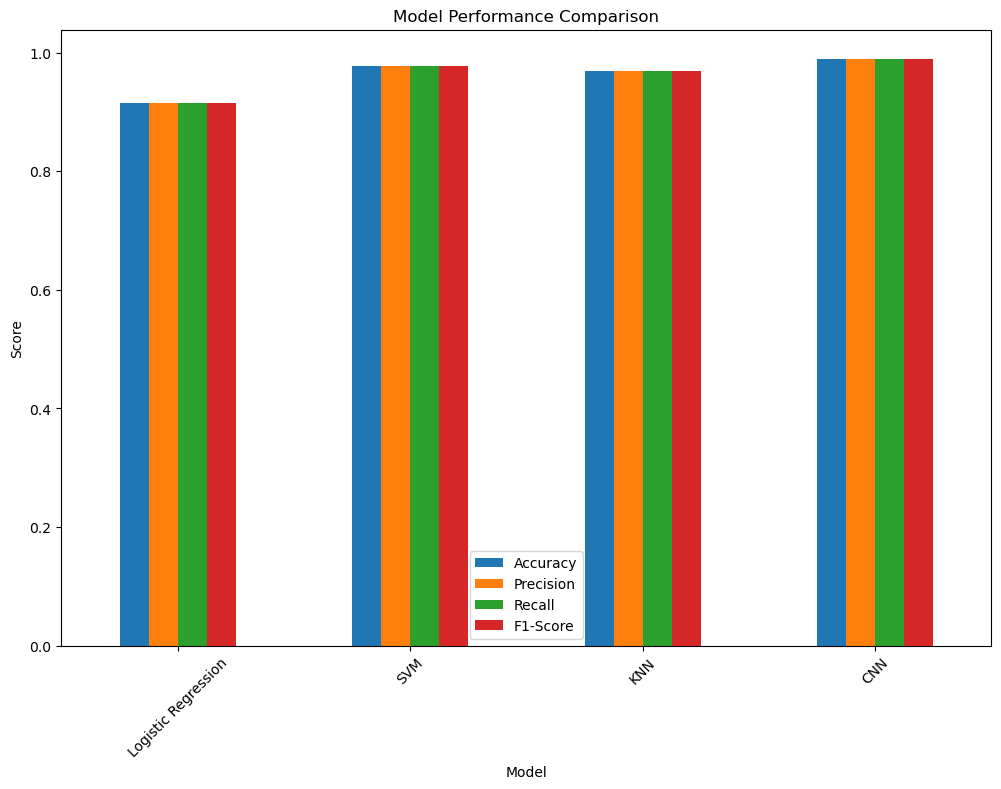

In [24]:
# Plot the comparison of model performance
fig, ax = plt.subplots(figsize=(12, 8))
metrics_df.plot(kind='bar', x='Model', ax=ax)
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Score')
ax.set_xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

##### Display the confusion matrix

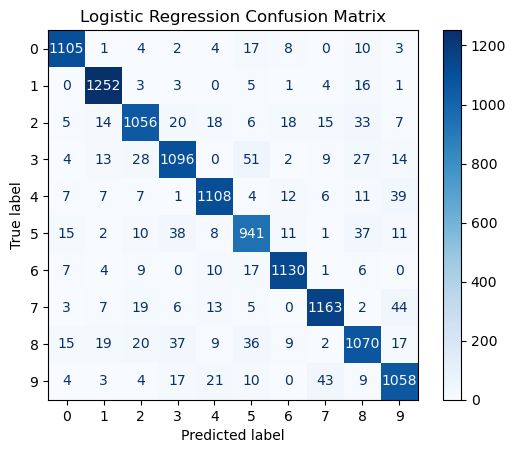

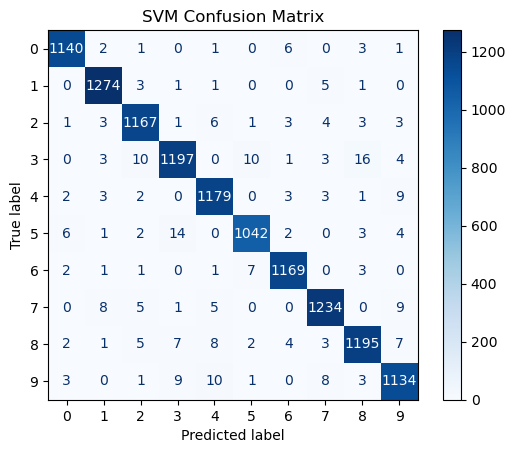

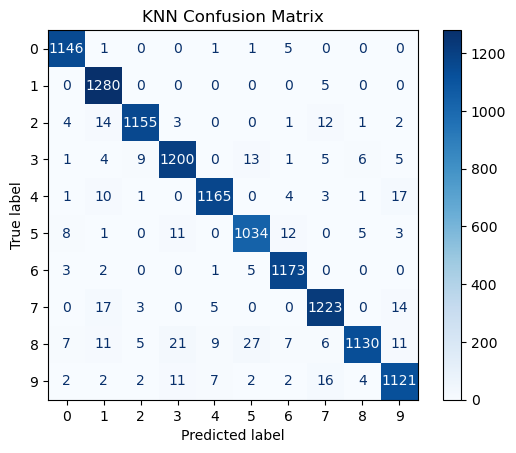

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


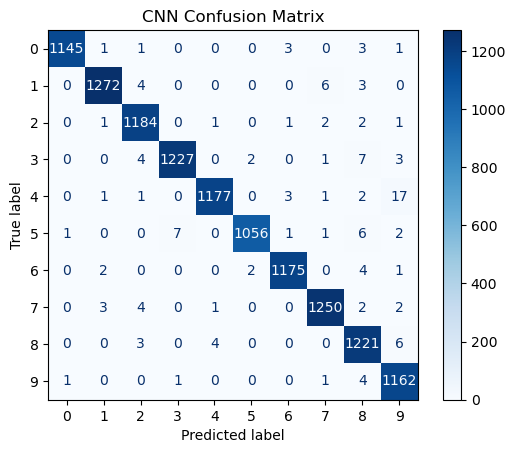

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to get model predictions
def get_predictions(model, x_data, is_cnn=False):
    if is_cnn:
        y_pred = model.predict(x_data)
        return y_pred.argmax(axis=1)
    else:
        return model.predict(x_data)

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, model, x_data, y_true, is_cnn=False):
    y_pred = get_predictions(model, x_data, is_cnn)
    
    # Convert y_true to class labels if one-hot encoded
    if is_cnn:
        y_true_classes = y_true.argmax(axis=1) if y_true.ndim == 2 else y_true
    else:
        y_true_classes = y_true
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred)
    
     # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot confusion matrices separately
plot_confusion_matrix('Logistic Regression', logistic_model, x_val, y_val, is_cnn=False)
plot_confusion_matrix('SVM', svm_model, x_val, y_val, is_cnn=False)
plot_confusion_matrix('KNN', knn_model, x_val, y_val, is_cnn=False)
plot_confusion_matrix('CNN', cnn_model, x_val_cnn, y_val, is_cnn=True)


In [26]:
# Identify the best model based on accuracy
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]

# Print the best model name and accuracy
print(f"Best Model: {best_model['Model']} with accuracy {best_model['Accuracy']:.4f}")


Best Model: CNN with accuracy 0.9891


##### Hyperparameter tuning of CNN model

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

class CNNHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential([
            Conv2D(
                filters=hp.Int('filters1', min_value=32, max_value=64, step=32),
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1)
            ),
            MaxPooling2D((2, 2)),
            Conv2D(
                filters=hp.Int('filters2', min_value=64, max_value=128, step=64),
                kernel_size=(3, 3),
                 activation='relu'
            ),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(
                units=hp.Int('units', min_value=64, max_value=128, step=64),
                activation='relu'
            ),
            Dense(10, activation='softmax')
        ])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='log')
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# Tuner setup
tuner = kt.RandomSearch(
    CNNHyperModel(),
     objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='my_dir',
    project_name='cnn_tuning'
)

# Perform the search
tuner.search(x_train_split_cnn, y_train_split_cnn, epochs=10, validation_data=(x_val_cnn, y_val_cnn))

# Get the best model
best_cnn_model = tuner.get_best_models(num_models=1)[0]# Train the best model and save the training history
history = best_cnn_model.fit(
    x_train_split_cnn, y_train_split_cnn,
    epochs=10,
    validation_data=(x_val_cnn, y_val_cnn)
)

# Evaluate the model
y_test_pred_cnn_tuned = best_cnn_model.predict(x_test_cnn)
y_test_pred_cnn_classes_tuned = np.argmax(y_test_pred_cnn_tuned, axis=1)
accuracy_cnn_tuned = accuracy_score(y_test, y_test_pred_cnn_classes_tuned)
print(f"CNN Test Accuracy (Tuned): {accuracy_cnn_tuned:.4f}")



Trial 5 Complete [00h 05m 23s]
val_accuracy: 0.9884999990463257

Best val_accuracy So Far: 0.9884999990463257
Total elapsed time: 00h 29m 15s
Epoch 1/10


e:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9955 - loss: 0.0213 - val_accuracy: 0.9848 - val_loss: 0.0990
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9951 - loss: 0.0228 - val_accuracy: 0.9829 - val_loss: 0.0969
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9960 - loss: 0.0146 - val_accuracy: 0.9886 - val_loss: 0.0703
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9970 - loss: 0.0128 - val_accuracy: 0.9814 - val_loss: 0.1330
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9960 - loss: 0.0191 - val_accuracy: 0.9861 - val_loss: 0.1328
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9961 - loss: 0.0174 - val_accuracy: 0.9857 - val_loss: 0.0908
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9964 - loss: 0.0166 - val_accuracy: 0.9864 - val_loss: 0.1003
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9971 - loss: 0.01

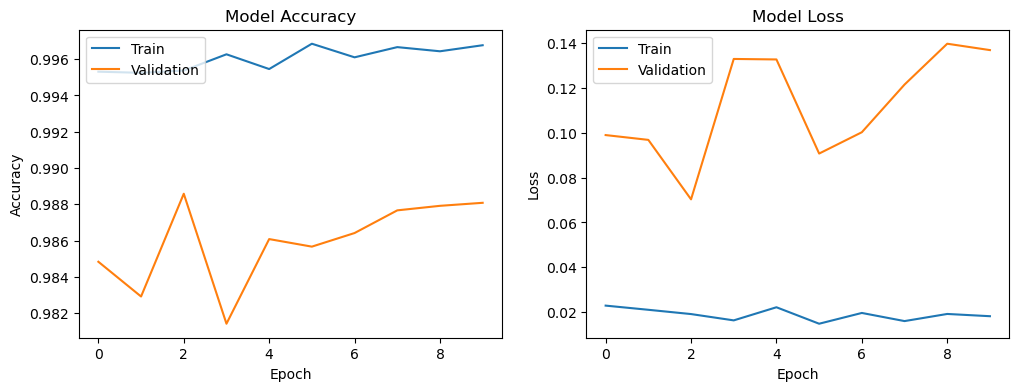

In [30]:
# Plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()
    plot_history(history)

##### Save the Model

In [34]:
tuner.get_best_models(num_models=1)[0].save('best_cnn_model.h5')


e:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
e:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━

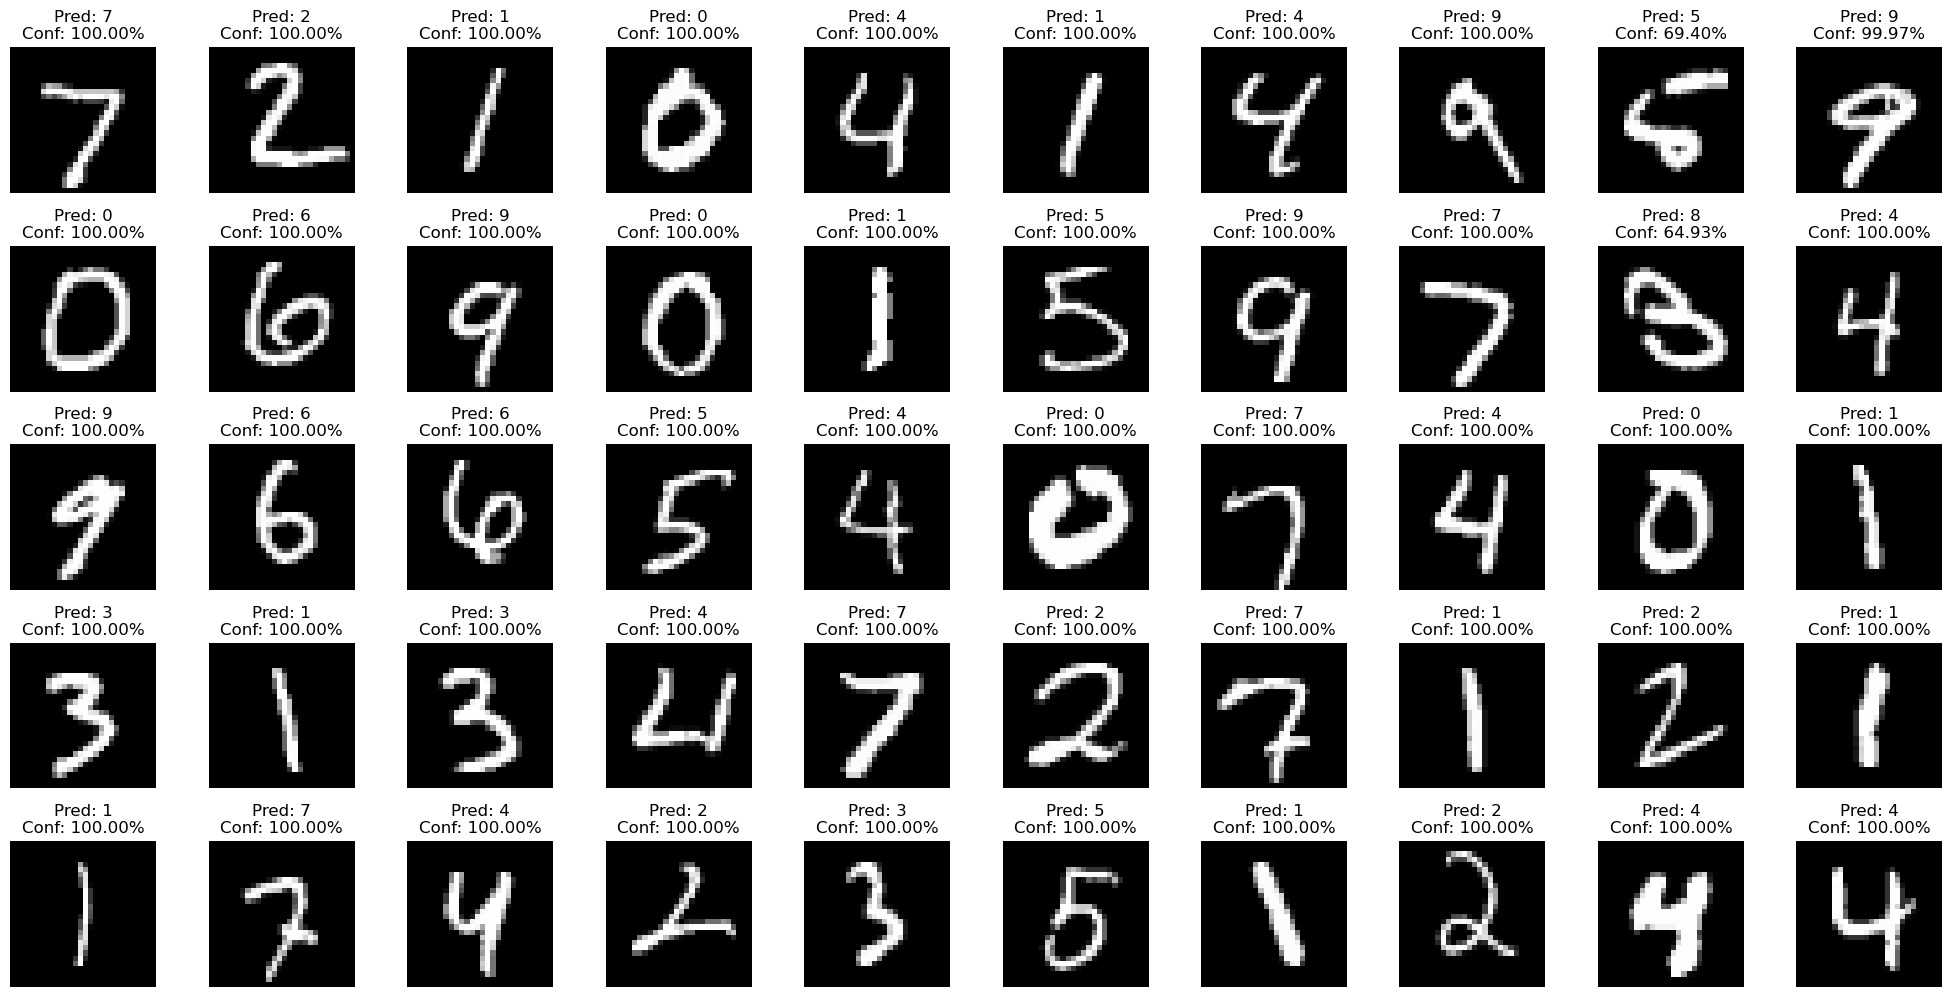

In [57]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the saved best CNN model
model = load_model('best_cnn_model.h5')

# Function to predict and display multiple test images in one plot
def predict_and_display_grid(test_images, test_labels, num_images=9):
    plt.figure(figsize=(20, 20))
   
    for i in range(num_images):
        test_image = test_images[i]
        actual_label = test_labels[i]
        
        # Preprocess the image
        image = np.expand_dims(test_image, axis=0)
        
        # Make a prediction
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        
        # Create a subplot for each image
        plt.subplot(10, 10, i + 1)
        plt.imshow(test_image.squeeze(), cmap='gray')
        plt.title(f"Pred: {predicted_class}\nConf: {confidence:.2f}%")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
:
# Predict and display the first 50 images
predict_and_display_grid(x_test, y_test, num_images=50)


#### Results and Analysis
The performance of the model is evaluated based on the chosen metrics. Factors influencing model performance include:

* Dataset Size and Quality: Larger and more diverse datasets generally lead to better performance.
* Model Architecture: The complexity of the model should match the problem's difficulty.
* Hyperparameter Tuning: Optimization of hyperparameters (learning rate, number of layers, etc.) can significantly impact results.

#### Conclusion
Handwritten digit recognition using the MNIST dataset is a fundamental task in computer vision. This project demonstrates the application of machine learning techniques to solve this problem. While simple models can achieve reasonable accuracy, more complex architectures like CNNs often yield superior results. Further improvements can be achieved through data augmentation, hyperparameter tuning, and exploring different model architectures.
